# 学習アルゴリズムの実装

1. ミニバッチ
訓練データの中からランダムに一部のデータを選び出す。
2. 勾配の算出
各重みの勾配を求める。
3. パラメータの更新
重みパラメータを勾配方向に微少量だけ更新する。
4. ステップ1から3を繰り返す



In [1]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNetで作成します。


↓実際のコード

In [2]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y =softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # 高速化部分を付け加える。
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [3]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [4]:
net.params['W1'].shape

(784, 100)

In [5]:
net.params['b1'].shape

(100,)

In [6]:
net.params['W2'].shape

(100, 10)

In [7]:
net.params['b2'].shape

(10,)

# ミニバッチ学習の実装

In [8]:
import numpy as np
from dataset.mnist import load_mnist

In [9]:
# テストとトレーニングデータ
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True, flatten=True)

In [10]:
# 空のリストの作成
train_loss_list = []

In [11]:
# ハイパーパラメーターの作成
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [12]:
%time
for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


## 損失関数の推移をグラフ化してみる。

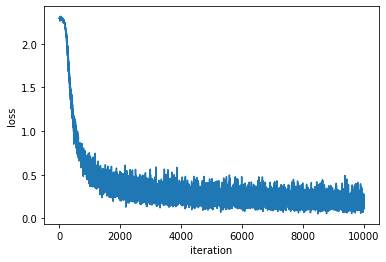

In [13]:
import matplotlib.pyplot as plt
#listのデータを数えてx軸を作成
x = np.arange(len(train_loss_list))
y = train_loss_list
# ラベル
plt.xlabel("iteration")
plt.ylabel("loss")
#表示
plt.plot(x, y);

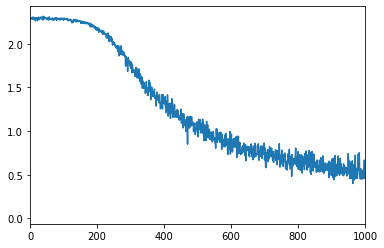

In [14]:
plt.xlim(0, 1000)
plt.plot(x, y);

# テストデータで評価してみる。

In [15]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
# 1 エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

In [16]:
# ハイパーパラメーターの作成(その２)　
# その１とほぼ同じだが、コメントアウト部分を行っていない。

iters_num = 10000
# train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [17]:
%time
for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |" + str(train_acc) + "," + str(test_acc))
    

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
train acc, test acc |0.11236666666666667,0.1135
train acc, test acc |0.7922333333333333,0.7952
train acc, test acc |0.8777666666666667,0.8812
train acc, test acc |0.8990833333333333,0.9011
train acc, test acc |0.9081333333333333,0.912
train acc, test acc |0.91545,0.9171
train acc, test acc |0.919,0.9203
train acc, test acc |0.9245666666666666,0.9254
train acc, test acc |0.9276166666666666,0.9282
train acc, test acc |0.9308166666666666,0.9325
train acc, test acc |0.9332833333333334,0.9326
train acc, test acc |0.93645,0.9372
train acc, test acc |0.9387166666666666,0.9386
train acc, test acc |0.9418333333333333,0.9417
train acc, test acc |0.9438666666666666,0.9424
train acc, test acc |0.9446,0.9442
train acc, test acc |0.9467333333333333,0.9463


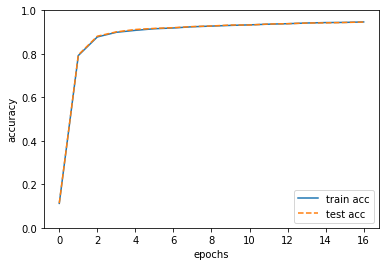

In [18]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
#listのデータを数えてx軸を作成
x = np.arange(len(train_acc_list))
#二つを比べるので別々に加える
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
# ラベル
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# legend(凡例)付きで表示。凡例は右下にしている。デフォルトは、左上。
plt.legend(loc='lower right')
# グラフを表示
plt.show()

# まとめ

- 機械学習で使用するデータは、訓練データとテストデータに分ける

- 訓練データで学習を行い、学習したモデルの汎化能力をテストデータで評価する。

- ニューラルネットワークの学習は、損失関数を指標として損失関数の値が小さくなるように重みパラメータを更新する

- 重みパラメータを更新するには、重みパラメータの勾配を利用して、勾配方向に重みの値を更新する作業を繰り返す。

- 微小な値を与えたときの差分によって微分を求めることを数値微分と言う。

- 数値微分によって、重みパラメータの勾配を求めることができる。

- 数値微分による計算には時間がかかるが、その実装は簡単である。

# 次週の予告

## 誤差逆伝播法は、高速に勾配を求めることができる！